# Set up workspace

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np

# Read in data

In [2]:
fpath = '/home/jovyan/normalizing-cdr-methods/data/raw_hector_simulation_output/'
fname_atm = 'output_10Pg_CDR_fromAtmosphere.csv'
fname_ocn = 'output_10Pg_CDR_fromOcean.csv'
fname_atm_ref = 'output_0Pg_CDR_fromAtmosphere.csv'
fname_ocn_ref = 'output_0Pg_CDR_fromOcean.csv'

In [3]:
df_atm = pd.read_csv(fpath+fname_atm)
df_ocn = pd.read_csv(fpath+fname_ocn)
df_atm_ref = pd.read_csv(fpath+fname_atm_ref)
df_ocn_ref = pd.read_csv(fpath+fname_ocn_ref)

# Process data

In [4]:
def process_data_to_xarray(df):
    variable_names=set(df.variable.values)
    
    for i, varname in enumerate(variable_names):
        if varname not in ['earth_c']:
            #print(varname)
            subset_variable=df[df.variable==varname]
            units=subset_variable.units.values
            years=subset_variable.year.values
            data=subset_variable.value.values

            if np.size(set(units))==1:
                var_units=set(units)
            else:
                print('Error! Not all values for this variable have the same units')

            da = xr.DataArray(
            data=data,
            dims=["year"],
            coords=dict(
                year=years,
            ),
            attrs=dict(
                units=var_units,
            ),
            )

            if i==0:
                ds=da.to_dataset(name=varname)
            else:
                ds[varname]=da
    
    return ds

In [5]:
ds_atm=process_data_to_xarray(df_atm)
ds_ocn=process_data_to_xarray(df_ocn)
ds_atm_ref=process_data_to_xarray(df_atm_ref)
ds_ocn_ref=process_data_to_xarray(df_ocn_ref)

# Make figures

In [6]:
for i,key in enumerate(ds_atm.keys()):
    print(key)

luc_uptake
ocean_tas
LL_CO3
RF_tot
HL_pH
ML_ocean_c
IO_ocean_c
ffi_emissions
detritus_c
LL_ocean_c
ocean_c
RH
PCO2
CO2_concentration
CO3
atmos_co2
thawedp_c
veg_c
luc_emissions
HL_DIC
LL_pH
HL_ocean_c
pH
NBP
permafrost_c
DO_ocean_c
HL_PCO2
NPP
LL_PCO2
DIC
LL_sst
heatflux
land_tas
LL_DIC
RF_CO2
heatflux_mixed
heatflux_interior
HL_CO3
sst
soil_c
HL_sst
global_tas
daccs_uptake


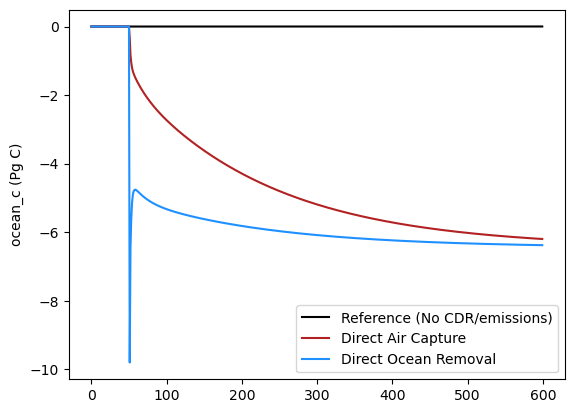

In [7]:
var='ocean_c'
show_delta=True
if show_delta:
    startval = ds_ocn_ref[var][4200]
    plt.plot(ds_ocn_ref[var][4200:4800]-startval,'-k', label='Reference (No CDR/emissions)')
    #plt.plot(ds_atm_ref[var][4200:4800],':', label='Reference (No CDR/emissions)')
    plt.plot(ds_atm[var][4200:4800]-startval, label='Direct Air Capture',color='firebrick')
    plt.plot(ds_ocn[var][4200:4800]-startval, label='Direct Ocean Removal',color='dodgerblue')
else:
    plt.plot(ds_ocn_ref[var][4200:4800],'-k', label='Reference (No CDR/emissions)')
    #plt.plot(ds_atm_ref[var][4200:4800],':', label='Reference (No CDR/emissions)')
    plt.plot(ds_atm[var][4200:4800], label='Direct Air Capture',color='firebrick')
    plt.plot(ds_ocn[var][4200:4800], label='Direct Ocean Removal',color='dodgerblue')
plt.ylabel(var+' ('+list(ds_atm.ocean_c.units)[0]+')')
plt.legend()

In [63]:
ref_year=4249
daccs=-10
end_year=ref_year+200

In [64]:
c_stock_vars=['atmos_co2',
              'ML_ocean_c','IO_ocean_c','DO_ocean_c',#'HL_ocean_c','LL_ocean_c',
             #'earth_c',
             'veg_c','detritus_c','soil_c']
colors=['orange',
        'dodgerblue','dodgerblue','darkblue',
       # '',
        'lightgreen','lightgreen','darkgreen']
linestyles=['-',
        ':','-','-',
       # '',
        ':','-','-']
for var in c_stock_vars:
    ds_atm['delta_'+var]=ds_atm[var]-ds_atm[var][ref_year]

<xarray.DataArray 'year' ()>
array(5999)
Coordinates:
    year     int64 5999


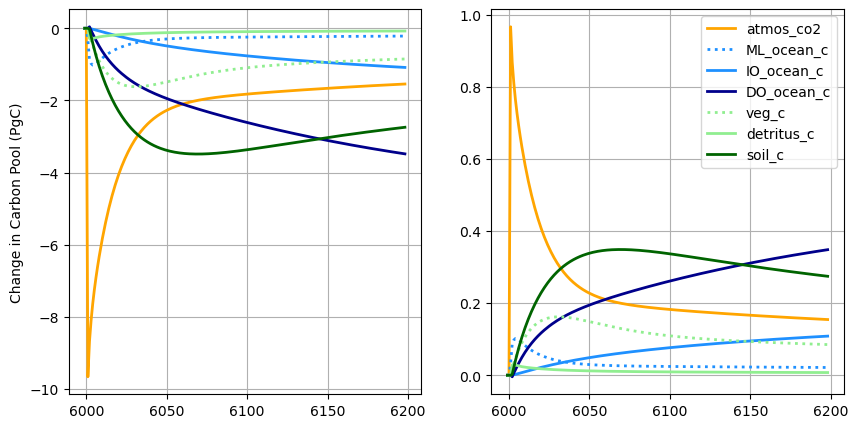

In [68]:
print(ds_atm.year[ref_year])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
for i,var in enumerate(c_stock_vars):
    plt.plot(ds_atm.year[ref_year:end_year], 
             ds_atm['delta_'+var][ref_year:end_year],
             color=colors[i], label=var, linewidth=2, linestyle=linestyles[i])
plt.ylabel('Change in Carbon Pool (PgC)')
plt.grid()

plt.subplot(1,2,2)
for i,var in enumerate(c_stock_vars):
    plt.plot(ds_atm.year[ref_year:end_year], 
             ds_atm['delta_'+var][ref_year:end_year]/daccs,
             color=colors[i], label=var, linewidth=2, linestyle=linestyles[i])
plt.legend()
plt.grid()